In [21]:
## MP 573 Lecture 12: DFT in Multiple Dimensions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import scipy.linalg as lin

font = {'weight' : 'normal',
        'size'   : 20}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

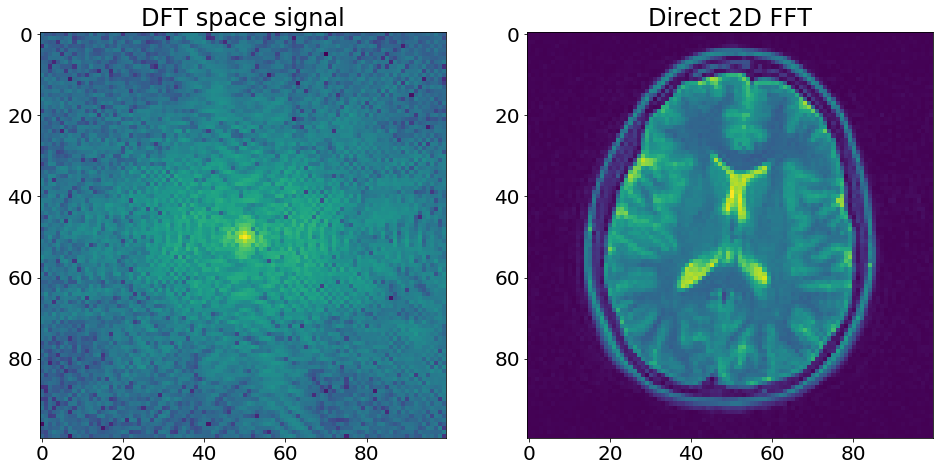

In [8]:
# Load some Fourier space MRI data
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']

# Run 2D iFFT 
fa = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(fhat)))

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow(np.log(abs(fhat)));
plt.title('DFT space signal')
plt.subplot(1,2,2)
plt.imshow(abs(fa));
plt.title('Direct 2D FFT');

Text(0.5, 1.0, '1D iDFT along y')

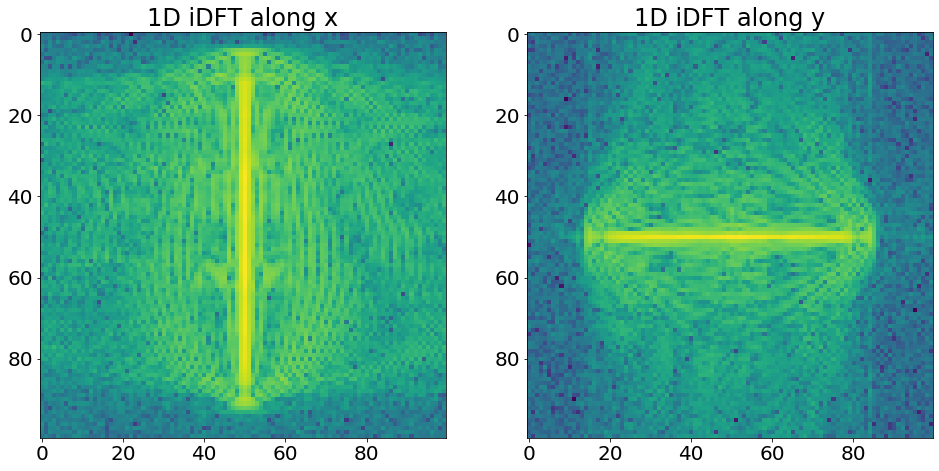

In [14]:
# Run iFFT only along x
fb1 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat,axes=0),axis=0),axes=0)

# Run iFFT only along y
fc1 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat,axes=1),axis=1),axes=1)

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow(np.log(abs(fb1)));
plt.title('1D iDFT along x')
plt.subplot(1,2,2)
plt.imshow(np.log(abs(fc1)));
plt.title('1D iDFT along y')

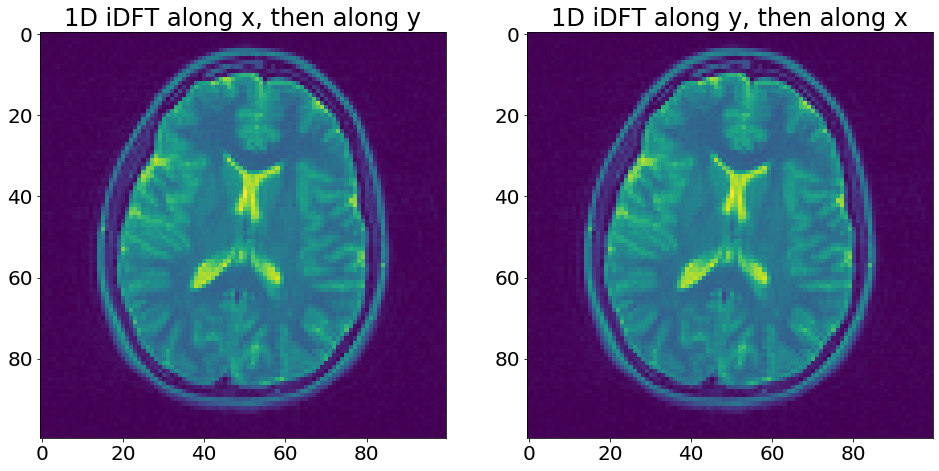

In [27]:
# Now let's run the DFT along the remaining dimension 
# Run iFFT only along x
fb = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fb1,axes=1),axis=1),axes=1)

# Run iFFT only along y
fc = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fc1,axes=0),axis=0),axes=0)

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow((abs(fb)));
plt.title('1D iDFT along x, then along y')
plt.subplot(1,2,2)
plt.imshow((abs(fc)));
plt.title('1D iDFT along y, then along x');

In [29]:
#Finally, let's check that our three versions of the reconstructed image are identical
diffb = np.linalg.norm(fa-fb)
diffc = np.linalg.norm(fa-fc)
print("Norm of the difference between fa and fb: = ", '{:f}'.format(diffb))
print("Norm of the difference between fa and fc: = ", '{:f}'.format(diffc))

Norm of the difference between fa and fb: =  0.000000
Norm of the difference between fa and fc: =  0.000000
